# Loading the dataset from Kaggle

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir ~/.kaggle

In [3]:
cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone

100% 1.51G/1.52G [00:12<00:00, 157MB/s]
100% 1.52G/1.52G [00:12<00:00, 135MB/s]


In [5]:
!unzip /content/ct-kidney-dataset-normal-cyst-tumor-and-stone.zip

Streaming output truncated to the last 5000 lines.
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4363).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4364).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4365).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4366).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4367).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4368).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4369).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-N

In [6]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
import splitfolders   

In [2]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob

# Splitting the dataset into train and test

In [9]:
splitfolders.ratio("/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
   output="./dataset",
   seed=7,
   ratio=(0.75,0.25)
)

Copying files: 12446 files [00:06, 1987.91 files/s]


# Data Exploration

In [8]:
train_path = "/content/dataset/train"
test_path = "/content/dataset/val"

# Image Augmentation

In [13]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20, # Rotate the image by up to 20 degrees
    width_shift_range=0.2, # Shift the image horizontally by up to 20% of its width
    height_shift_range=0.2, # Shift the image vertically by up to 20% of its height
    fill_mode='nearest' # Fill any gaps created by the above transformations with the nearest pixel value
)
test_generator = ImageDataGenerator(rescale=1./255.)

In [14]:
train_datagen = train_generator.flow_from_directory(
    train_path, 
    batch_size=100,
    target_size=(128, 128), 
    class_mode = 'categorical'
)
test_datagen = test_generator.flow_from_directory(
    test_path, 
    batch_size=100,
    target_size=(128, 128),
    class_mode = 'categorical'
)

Found 9332 images belonging to 4 classes.
Found 3114 images belonging to 4 classes.


## Training Dataset

In [7]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  4


In [10]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 1032/1032 [00:08<00:00, 122.85it/s]


In [11]:
data.shape

(9332, 2)

In [12]:
from collections import Counter
Counter(y_data)

Counter({'Cyst': 2781, 'Tumor': 1712, 'Normal': 3807, 'Stone': 1032})

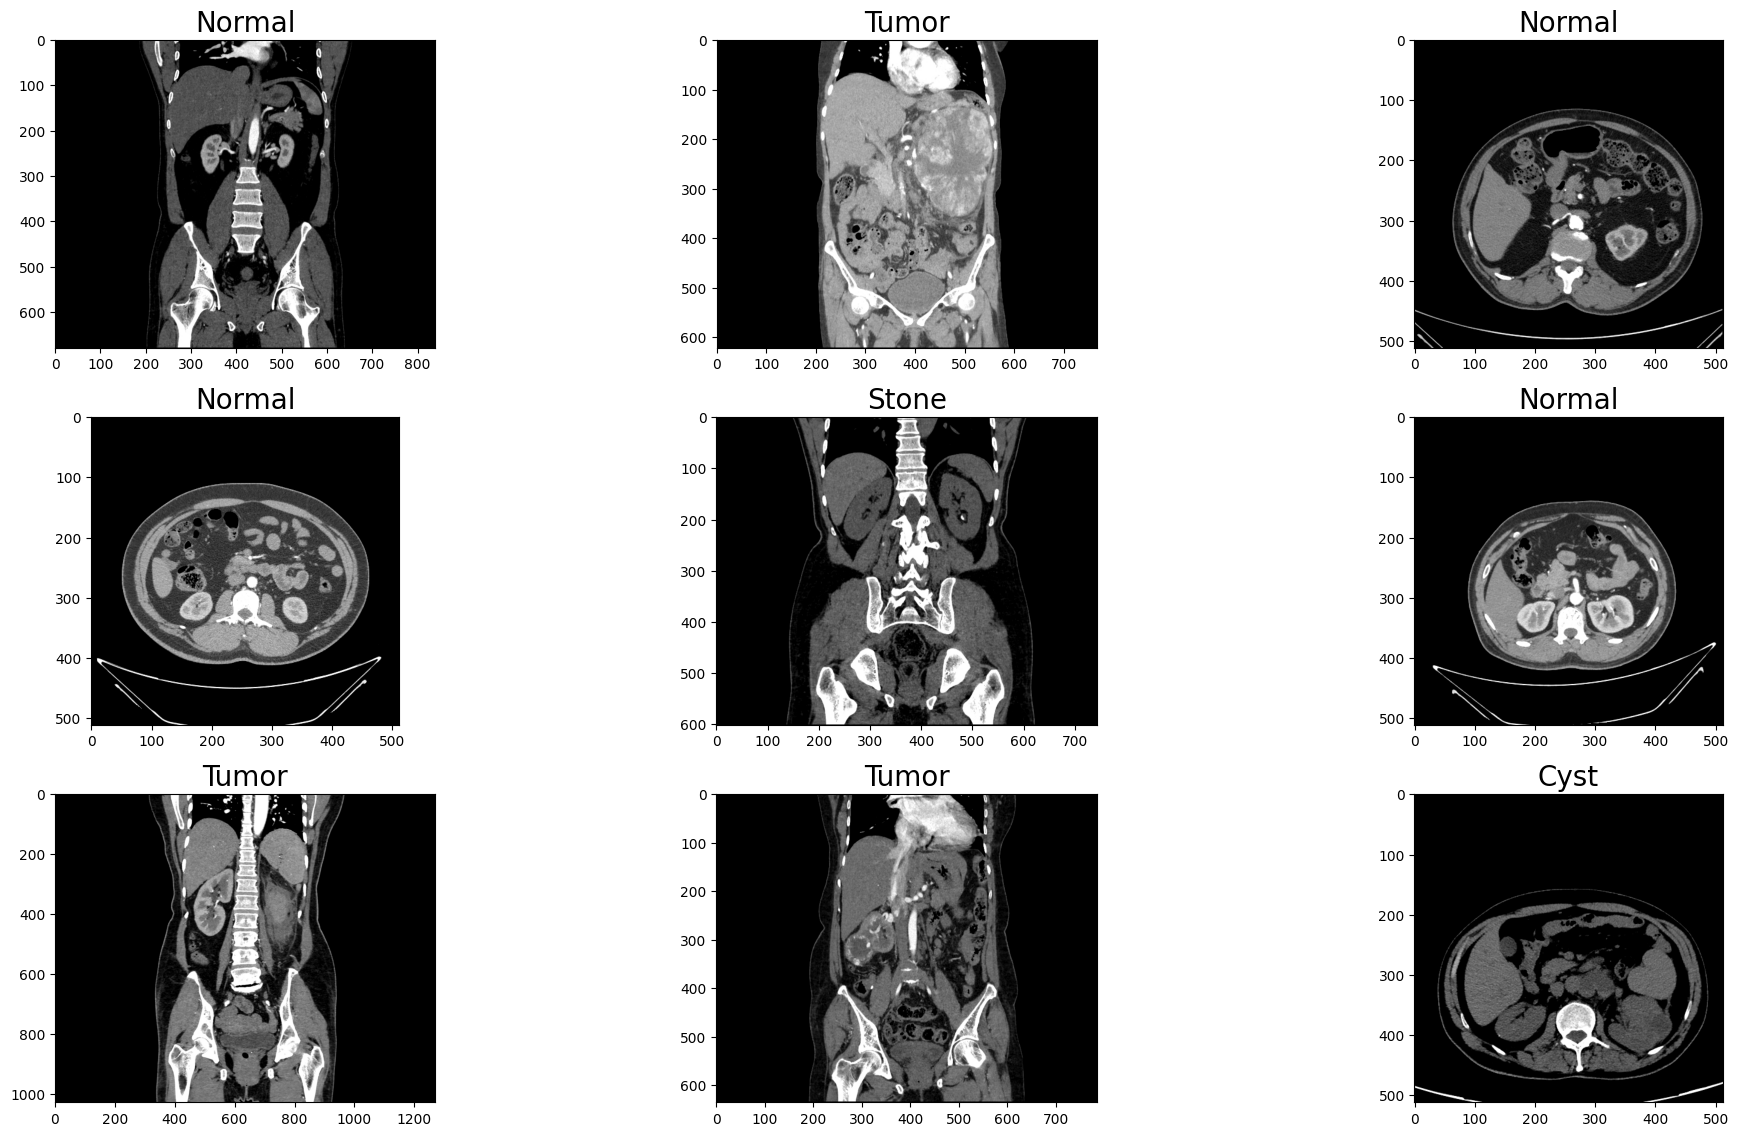

In [13]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(9000)
    plt.title('{0}'.format(data.label[index]),fontdict={'size':20})
    plt.imshow(data.image[index])
    plt.tight_layout()

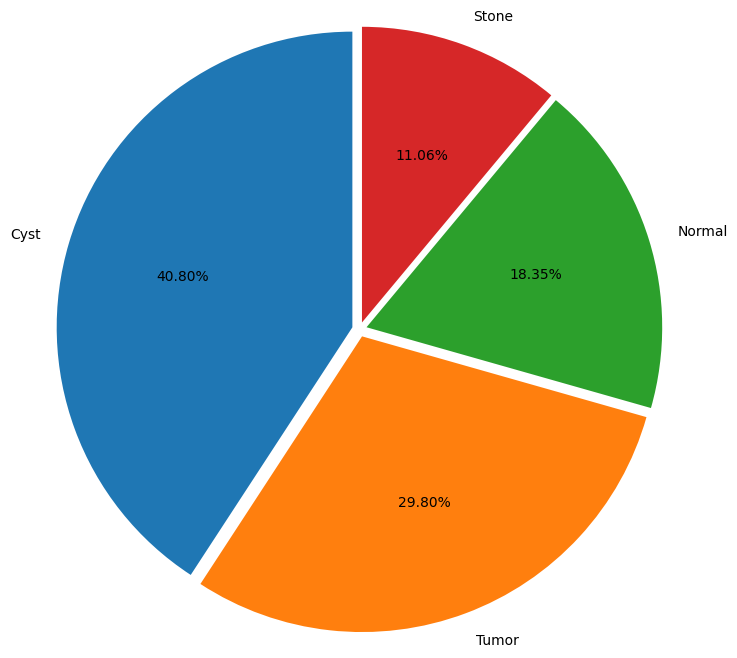

In [14]:
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05,0.05,0.05],autopct='%0.2f%%',labels=['Cyst', 'Tumor', 'Normal', 'Stone'], radius=2)
plt.show()

## Testing Dataset

In [ ]:
className = glob(test_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  4


In [ ]:
x_data = [] 
y_data = [] 

for category in glob(test_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 1032/1032 [00:08<00:00, 122.85it/s]


In [ ]:
data.shape

(9332, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'Cyst': 2781, 'Tumor': 1712, 'Normal': 3807, 'Stone': 1032})

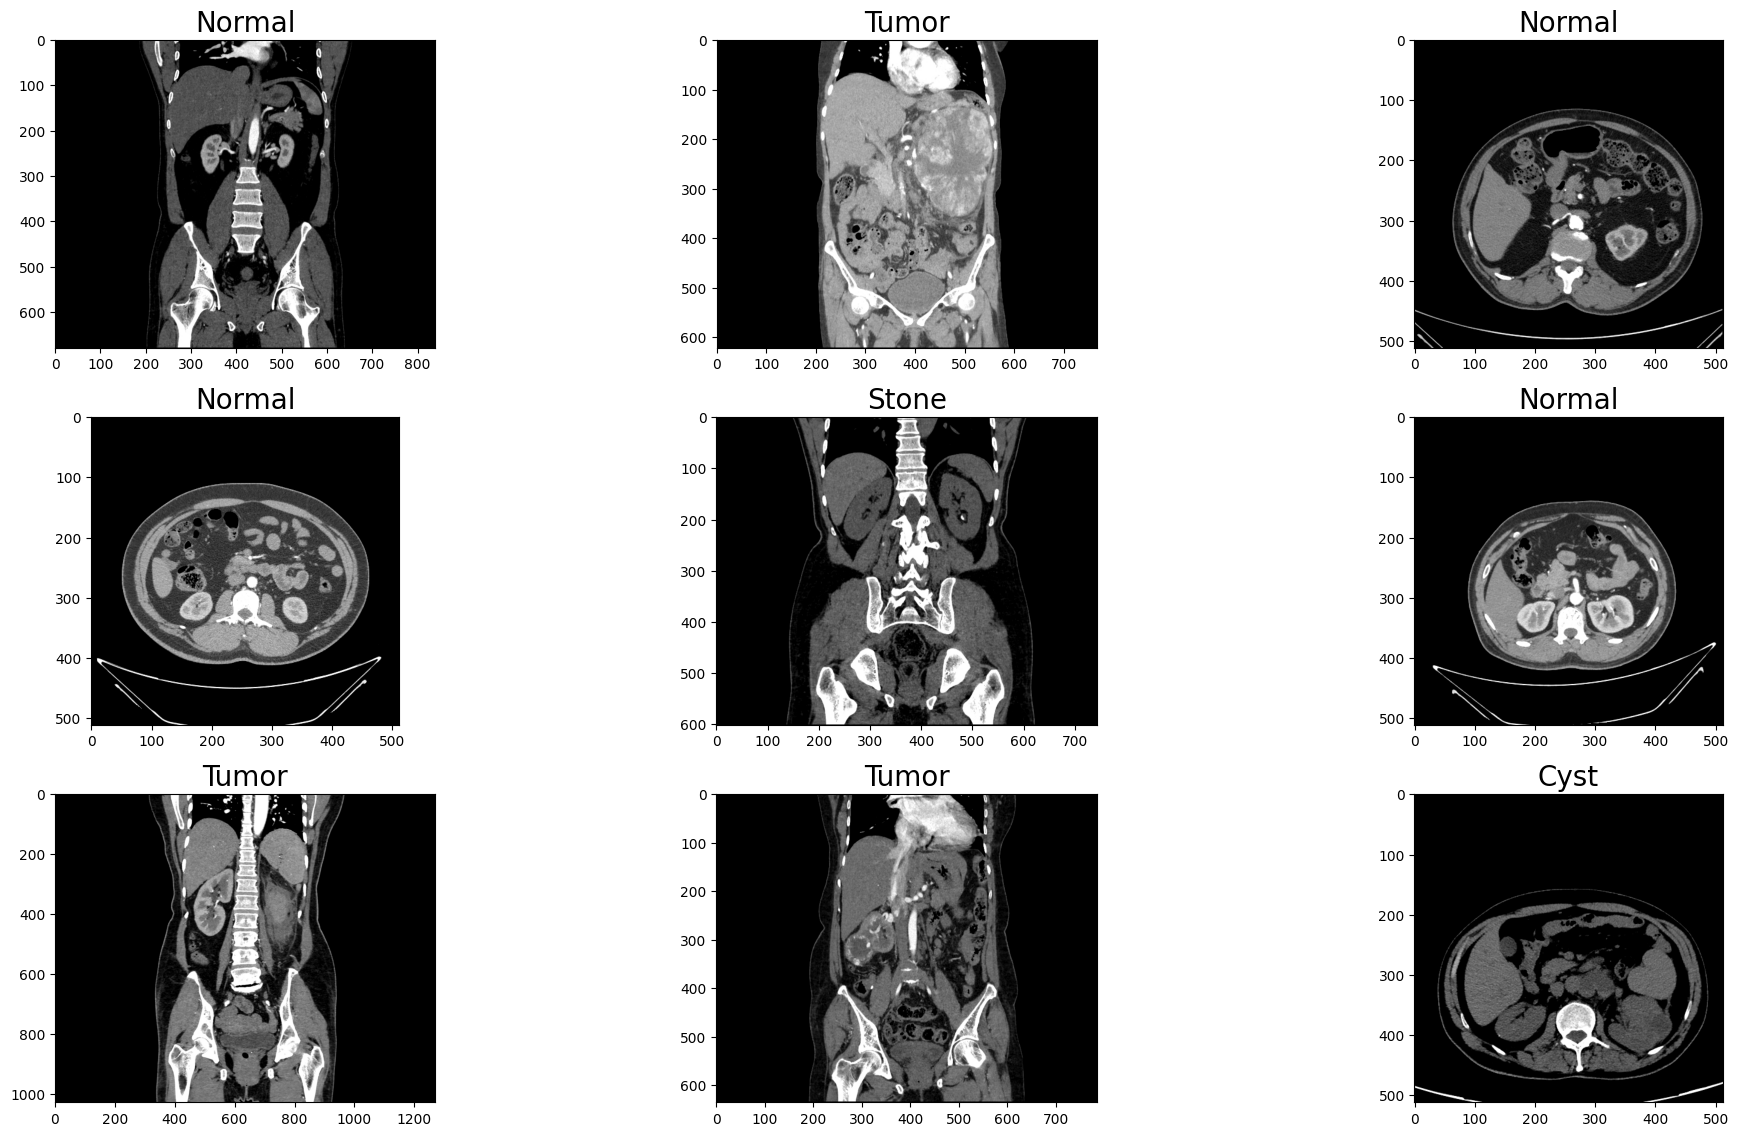

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(9000)
    plt.title('{0}'.format(data.label[index]),fontdict={'size':20})
    plt.imshow(data.image[index])
    plt.tight_layout()

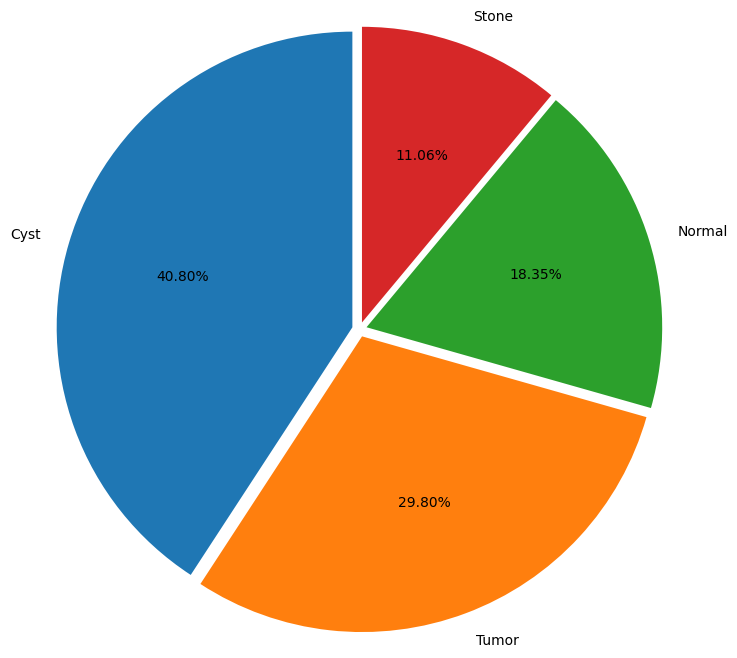

In [ ]:
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05,0.05,0.05],autopct='%0.2f%%',labels=['Cyst', 'Tumor', 'Normal', 'Stone'], radius=2)
plt.show()

# Model Building

## CNN Model

In [15]:
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected layer with 512 hidden units
model.add(Dense(512, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer
model.add(Dense(4, activation='softmax'))


In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [17]:
hist = model.fit_generator(
        generator = train_datagen,
        epochs=10
        ,
        validation_data = test_datagen)

Epoch 1/10
94/94 [==============================] - 134s 1s/step - loss: 1.0343 - accuracy: 0.5941 - val_loss: 0.9819 - val_accuracy: 0.6490
Epoch 2/10
94/94 [==============================] - 132s 1s/step - loss: 0.8455 - accuracy: 0.6787 - val_loss: 0.8007 - val_accuracy: 0.6962
Epoch 3/10
94/94 [==============================] - 144s 2s/step - loss: 0.7387 - accuracy: 0.7187 - val_loss: 0.7858 - val_accuracy: 0.6818
Epoch 4/10
94/94 [==============================] - 136s 1s/step - loss: 0.6197 - accuracy: 0.7554 - val_loss: 0.7848 - val_accuracy: 0.6885
Epoch 5/10
94/94 [==============================] - 118s 1s/step - loss: 0.5164 - accuracy: 0.8019 - val_loss: 0.8461 - val_accuracy: 0.7450
Epoch 6/10
94/94 [==============================] - 118s 1s/step - loss: 0.4307 - accuracy: 0.8308 - val_loss: 0.6872 - val_accuracy: 0.7922
Epoch 7/10
94/94 [==============================] - 116s 1s/step - loss: 0.3828 - accuracy: 0.8491 - val_loss: 0.7873 - val_accuracy: 0.7662
Epoch 8/10
94

### Performance of the model

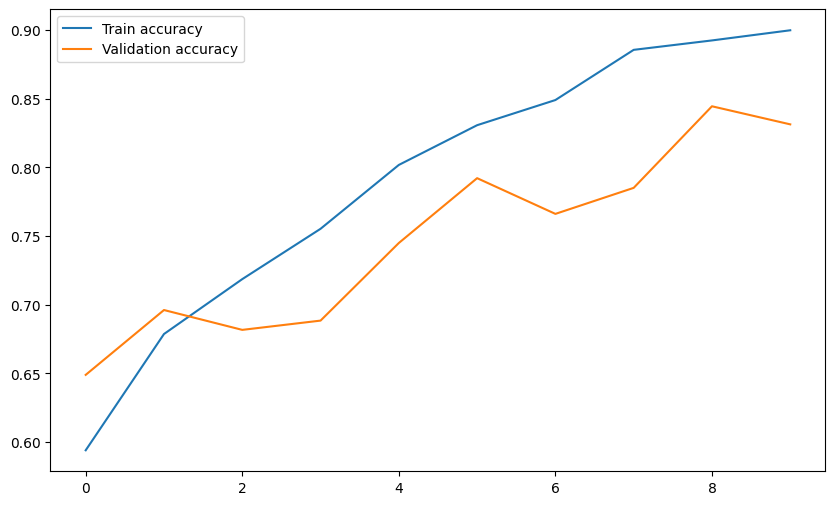

In [18]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.show()

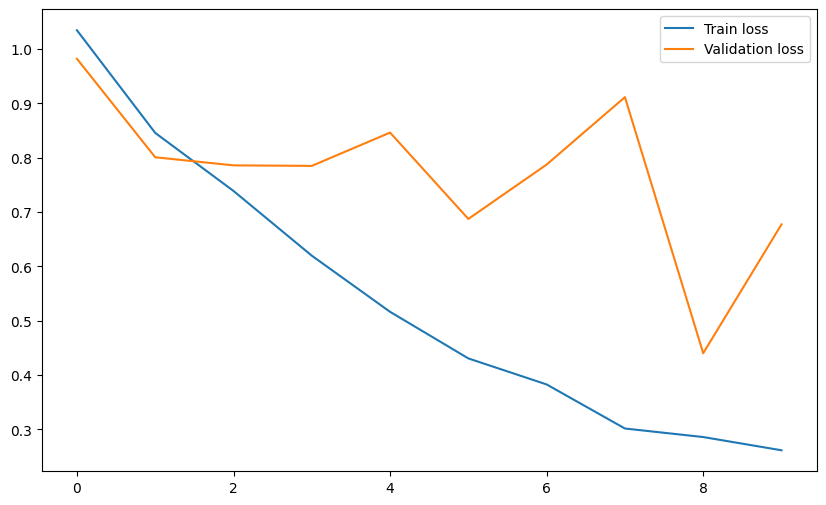

In [19]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [22]:
model.evaluate(test_datagen)

32/32 [==============================] - 21s 642ms/step - loss: 0.6772 - accuracy: 0.8314


[0.6771951913833618, 0.8314065337181091]

# Pre-Trained Models

## VGG16

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze all the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

vmodel = Model(inputs=base_model.input, outputs=predictions)

vmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vhistory = vmodel.fit(train_datagen, epochs=5, validation_data=test_datagen)

Epoch 1/5
94/94 [==============================] - 127s 1s/step - loss: 1.4597 - accuracy: 0.4891 - val_loss: 1.1547 - val_accuracy: 0.5546
Epoch 2/5
94/94 [==============================] - 119s 1s/step - loss: 0.9873 - accuracy: 0.6246 - val_loss: 0.8504 - val_accuracy: 0.6657
Epoch 3/5
94/94 [==============================] - 139s 1s/step - loss: 0.7779 - accuracy: 0.6934 - val_loss: 0.7190 - val_accuracy: 0.7341
Epoch 4/5
94/94 [==============================] - 120s 1s/step - loss: 0.6925 - accuracy: 0.7281 - val_loss: 0.5932 - val_accuracy: 0.7710
Epoch 5/5
94/94 [==============================] - 119s 1s/step - loss: 0.6133 - accuracy: 0.7607 - val_loss: 0.5164 - val_accuracy: 0.7977


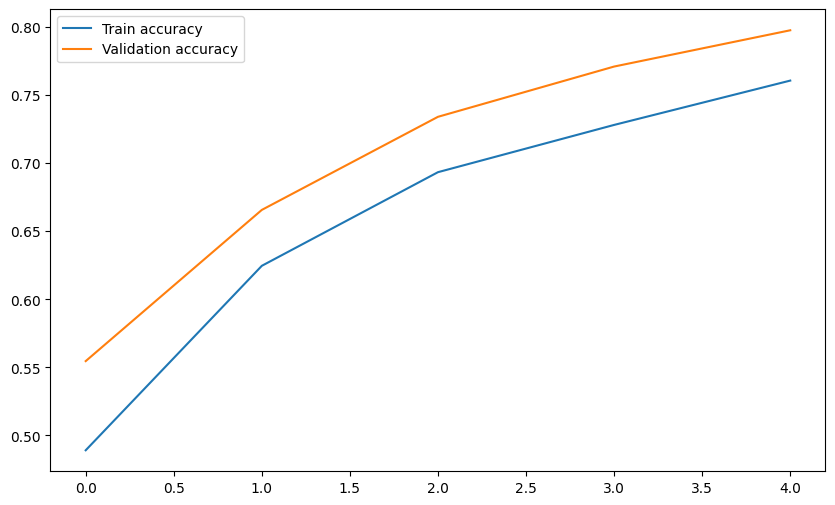

In [24]:
plt.figure(figsize=[10,6])
plt.plot(vhistory.history["accuracy"], label = "Train accuracy")
plt.plot(vhistory.history["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.show()

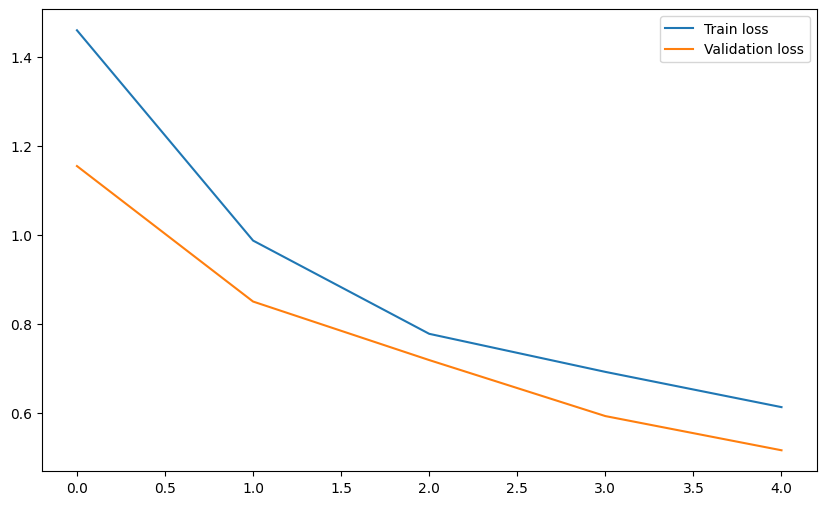

In [25]:
plt.figure(figsize=(10,6))
plt.plot(vhistory.history['loss'], label = "Train loss")
plt.plot(vhistory.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [26]:
vmodel.evaluate(test_datagen)

32/32 [==============================] - 22s 672ms/step - loss: 0.5164 - accuracy: 0.7977


[0.5163645148277283, 0.7976878881454468]

In [27]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze all the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

resmodel = Model(inputs=base_model.input, outputs=predictions)

resmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
reshistory = resmodel.fit(train_datagen, epochs=5, validation_data=test_datagen)

Epoch 1/5
94/94 [==============================] - 152s 1s/step - loss: 1.6799 - accuracy: 0.4041 - val_loss: 1.4267 - val_accuracy: 0.4078
Epoch 2/5
94/94 [==============================] - 119s 1s/step - loss: 1.2843 - accuracy: 0.5059 - val_loss: 1.2755 - val_accuracy: 0.4175
Epoch 3/5
94/94 [==============================] - 120s 1s/step - loss: 1.1661 - accuracy: 0.5402 - val_loss: 1.1241 - val_accuracy: 0.5109
Epoch 4/5
94/94 [==============================] - 119s 1s/step - loss: 1.0772 - accuracy: 0.5649 - val_loss: 1.1409 - val_accuracy: 0.4740
Epoch 5/5
94/94 [==============================] - 120s 1s/step - loss: 1.0379 - accuracy: 0.5819 - val_loss: 1.0391 - val_accuracy: 0.5928


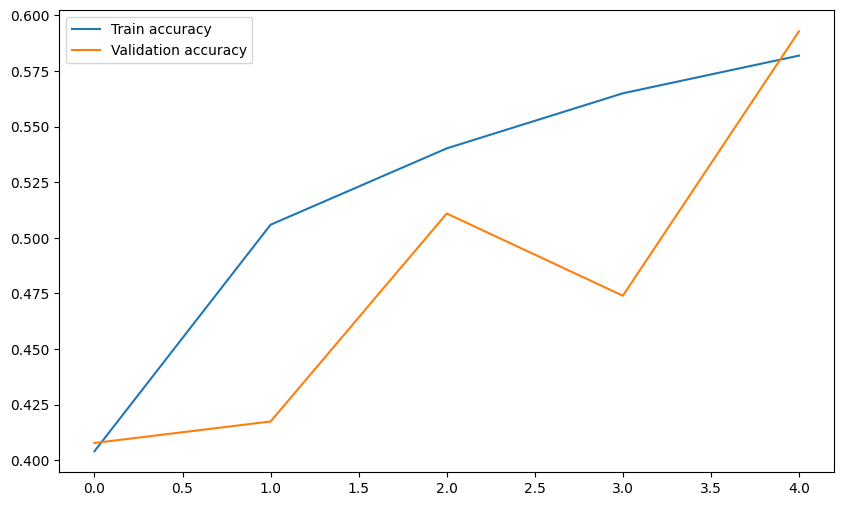

In [28]:
plt.figure(figsize=[10,6])
plt.plot(reshistory.history["accuracy"], label = "Train accuracy")
plt.plot(reshistory.history["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.show()

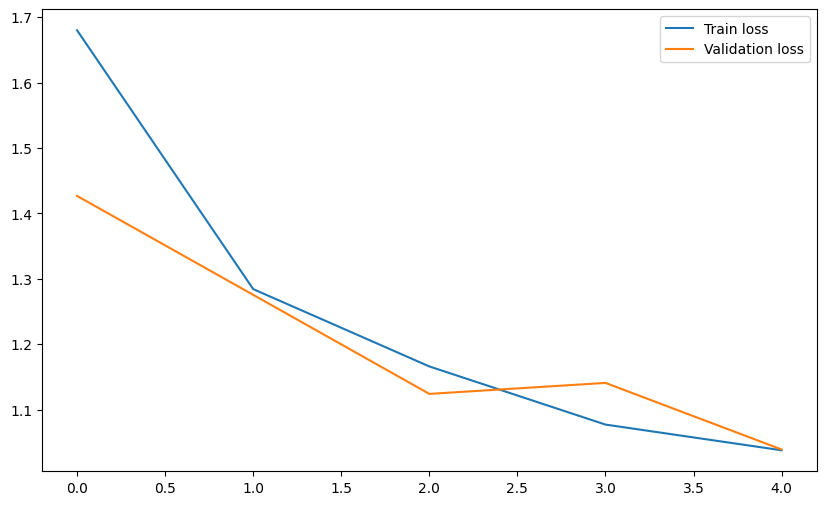

In [29]:
plt.figure(figsize=(10,6))
plt.plot(reshistory.history['loss'], label = "Train loss")
plt.plot(reshistory.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [30]:
resmodel.evaluate(test_datagen)

32/32 [==============================] - 23s 704ms/step - loss: 1.0391 - accuracy: 0.5928


[1.0391201972961426, 0.5928066968917847]

In [35]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze all the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

imodel = Model(inputs=base_model.input, outputs=predictions)

imodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ihistory = imodel.fit(train_datagen, epochs=5, validation_data=test_datagen)

87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/5
94/94 [==============================] - 133s 1s/step - loss: 1.5319 - accuracy: 0.4629 - val_loss: 0.9475 - val_accuracy: 0.6638
Epoch 2/5
94/94 [==============================] - 119s 1s/step - loss: 1.0901 - accuracy: 0.5972 - val_loss: 0.8250 - val_accuracy: 0.6975
Epoch 3/5
94/94 [==============================] - 119s 1s/step - loss: 0.9424 - accuracy: 0.6345 - val_loss: 0.8208 - val_accuracy: 0.6863
Epoch 4/5
94/94 [==============================] - 117s 1s/step - loss: 0.8417 - accuracy: 0.6709 - val_loss: 0.7082 - val_accuracy: 0.7225
Epoch 5/5
94/94 [==============================] - 119s 1s/step - loss: 0.7969 - accuracy: 0.6881 - val_loss: 0.6887 - val_accuracy: 0.7376


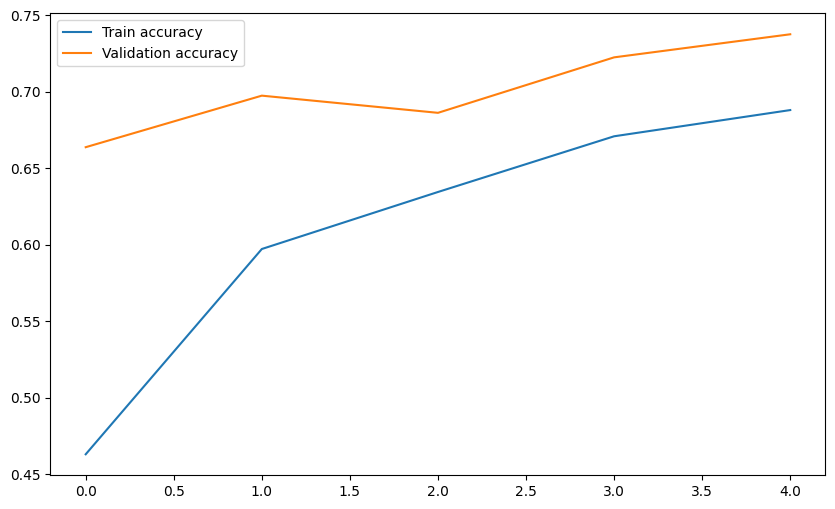

In [36]:
plt.figure(figsize=[10,6])
plt.plot(ihistory.history["accuracy"], label = "Train accuracy")
plt.plot(ihistory.history["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.show()

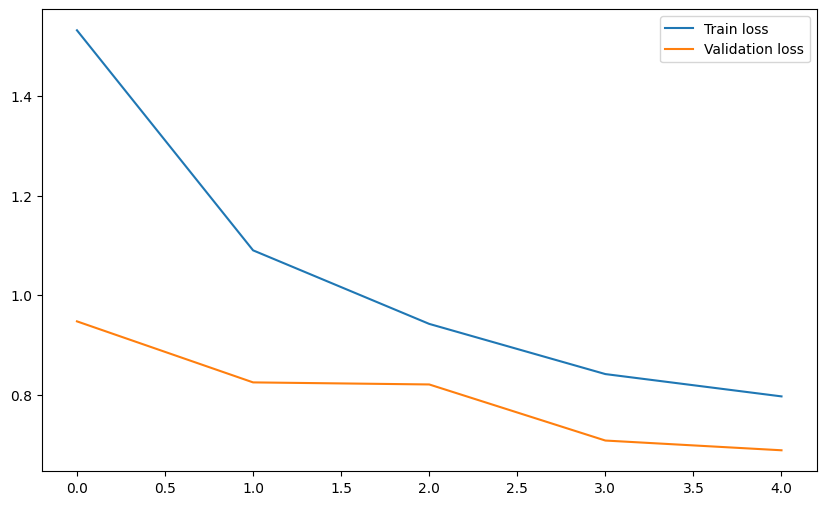

In [37]:
plt.figure(figsize=(10,6))
plt.plot(ihistory.history['loss'], label = "Train loss")
plt.plot(ihistory.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [38]:
imodel.evaluate(test_datagen)

32/32 [==============================] - 22s 690ms/step - loss: 0.6887 - accuracy: 0.7376


[0.688681960105896, 0.7376365065574646]